Analyses pre-registered for Politics Survey (testing the social valence bias).

Pre-registration: https://osf.io/de935

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from __future__ import division
%matplotlib inline
%load_ext rpy2.ipython
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.stats.api as sms
from pyspan.config import *
from pyspan.plurals.analysis import *
assert mturk

In [3]:
# Comment to include participants who failed the attention check
politics = politics.loc[politics.atc_passed]
valence = valence.loc[valence.atc_passed]
cl = cl.loc[cl.atc_passed]

# Demographics

In [4]:
print len(politics.loc[politics.ident == "REPUBLICAN"]), \
      len(politics.loc[politics.ident == "DEMOCRAT"])

145 135


In [5]:
demographic_info(politics.loc[politics.ident == "REPUBLICAN"])

Age: 41.8206896552 (SE = 0.988907296148)
Gender: [('Female', 86), ('Male', 59)]


In [6]:
demographic_info(politics.loc[politics.ident == "DEMOCRAT"])

Age: 36.5481481481 (SE = 0.943027042055)
Gender: [('Female', 73), ('Male', 61), ('Other (please specify)', 1)]


In [7]:
len(politics.loc[(politics.Condition == "DEMOCRAT") & (politics.ident == "DEMOCRAT")]), \
len(politics.loc[(politics.Condition == "DEMOCRAT") & (politics.ident == "REPUBLICAN")]), \
len(politics.loc[(politics.Condition == "REPUBLICAN") & (politics.ident == "DEMOCRAT")]), \
len(politics.loc[(politics.Condition == "REPUBLICAN") & (politics.ident == "REPUBLICAN")])

(68, 75, 67, 70)

# Results

## Evidence for the AVB

We pre-registered three different criteria for operationalizing which word in a given pair is considered the more positively-valenced choice. The submitted manuscript reports results for the within-subjects analysis.

### 1. Between subjects analysis: 60% item selection threshold

Considers a word to be positive when at least 60% of participants judged it to be more positively-valenced than its accompanying word.

In [8]:
positive60, negative60 = agreement_items(valence, [ "POSITIVE", "NEGATIVE" ], .6)

#### Logistic regression

Selection of positive word ~ Participant's political affiliation + Condition + Participant's political affiliation * Condition + Dummy indicating whether or not this was the first survey the participant took (including participant-level effects)

In [9]:
pdummied, Y = dummy(politics, [ "REPUBLICAN", "DEMOCRAT" ],
                    np.stack((positive60, negative60)), 
                    ixs = (words.index + 100).values)
X, Y = df_to_matrix(pdummied, Y, ixs = (words.index + 100).values,
                    columns = { 0: "id", 1: "condition", 2: (0,1), 
                                3: "order" })

In [10]:
logit = SparseLR(Y, X); print logit.coef[:4]; logit.auc

[0.         0.         0.38626369 0.        ]


0.6131082248262879

#### t-tests

In [11]:
psummary = politics[["Condition", "ident"]]
dat = politics[(words.index+100).values].values
props = np.apply_along_axis(get_prop, 1, dat, positive60, 
                            negative60)
psummary["ppos"] = props
assert psummary.values.shape == (len(politics), 3)

For participants in the Democrat condition, the difference in means mean(% positive words chosen amongst Democrats) - mean(% positive words chosen amongst Republicans) > 0.

In [12]:
a = psummary.loc[(psummary["Condition"] == "DEMOCRAT") & (psummary["ident"] == "DEMOCRAT")]["ppos"]
b = psummary.loc[(psummary["Condition"] == "DEMOCRAT") & (psummary["ident"] == "REPUBLICAN")]["ppos"]
t, p = stats.ttest_ind(a, b, equal_var=False)
# Divide two-sided p-value by two for a one-sided test
t, p/2

(7.085419454446693, 3.113747964014339e-11)

For participants in the Republican condition, the difference in means mean(% positive words chosen amongst Republicans) - mean(% positive words chosen amongst Democrats) > 0.

In [13]:
a = psummary.loc[(psummary["Condition"] == "REPUBLICAN") & (psummary["ident"] == "REPUBLICAN")]["ppos"].values
b = psummary.loc[(psummary["Condition"] == "REPUBLICAN") & (psummary["ident"] == "DEMOCRAT")]["ppos"].values
t, p = stats.ttest_ind(a, b, equal_var=False)
# Divide two-sided p-value by two for a one-sided test
t, p/2

(7.363518171515539, 8.859462723623227e-12)

The difference in means mean(% positive words chosen amongst those whose condition matched their political identity) - mean(% positive words chosen amongst those whose condition didn't match their political identity) > 0

In [14]:
a = psummary.loc[psummary["Condition"] == psummary["ident"]]["ppos"].values
b = psummary.loc[psummary["Condition"] != psummary["ident"]]["ppos"].values
t, p = stats.ttest_ind(a, b, equal_var=False)
# Divide two-sided p-value by two for a one-sided test
t, p/2

(10.193431737375185, 3.436511102368558e-21)

### 2. Between subjects analysis: 80% item selection threshold

Considers a word to be positive when at least 80% of participants judged it to be more positively-valenced than its accompanying word.

In [15]:
positive80, negative80 = agreement_items(valence, [ "POSITIVE", "NEGATIVE" ], .8)

#### Logistic regression

In [16]:
pdummied, Y = dummy(politics, [ "REPUBLICAN", "DEMOCRAT" ],
                    np.stack((positive80, negative80)), 
                    ixs = (words.index + 100).values)
X, Y = df_to_matrix(pdummied, Y, ixs = (words.index + 100).values,
                    columns = { 0: "id", 1: "condition", 2: (0,1), 
                                3: "order" })

In [17]:
logit = SparseLR(Y, X); print logit.coef[:4]; logit.auc

[0.         0.         0.42830992 0.        ]


0.643413392144372

#### t-tests

In [18]:
psummary = politics[["Condition", "ident"]]
dat = politics[(words.index+100).values].values
props = np.apply_along_axis(get_prop, 1, dat, positive80, 
                            negative80)
psummary["ppos"] = props
assert psummary.values.shape == (len(politics), 3)

For participants in the Democrat condition, the difference in means mean(% positive words chosen amongst Democrats) - mean(% positive words chosen amongst Republicans) > 0.

In [19]:
a = psummary.loc[(psummary["Condition"] == "DEMOCRAT") & (psummary["ident"] == "DEMOCRAT")]["ppos"].values
b = psummary.loc[(psummary["Condition"] == "DEMOCRAT") & (psummary["ident"] == "REPUBLICAN")]["ppos"].values
t, p = stats.ttest_ind(a, b, equal_var=False)
# Divide two-sided p-value by two for a one-sided test
t, p/2

(9.12168735747319, 4.060179069628331e-16)

For participants in the Republican condition, the difference in means mean(% positive words chosen amongst Republicans) - mean(% positive words chosen amongst Democrats) > 0.

In [20]:
a = psummary.loc[(psummary["Condition"] == "REPUBLICAN") & (psummary["ident"] == "REPUBLICAN")]["ppos"].values
b = psummary.loc[(psummary["Condition"] == "REPUBLICAN") & (psummary["ident"] == "DEMOCRAT")]["ppos"].values
t, p = stats.ttest_ind(a, b, equal_var=False)
# Divide two-sided p-value by two for a one-sided test
t, p/2

(7.722958007346269, 1.2157387058417762e-12)

The difference in means mean(% positive words chosen amongst those whose condition matched their political identity) - mean(% positive words chosen amongst those whose condition didn't match their political identity) > 0

In [21]:
a = psummary.loc[psummary["Condition"] == psummary["ident"]]["ppos"].values
b = psummary.loc[psummary["Condition"] != psummary["ident"]]["ppos"].values
t, p = stats.ttest_ind(a, b, equal_var=False)
# Divide two-sided p-value by two for a one-sided test
t, p/2

(11.838367295561595, 1.1862493480737845e-26)

### 3. Within-subjects analysis

Considers a word to be more positive when the participants had themselves selected that word as more positively-valenced in Survey 1

#### Logistic regression

In [22]:
# Positive
ixs = (words.index[:10] + 100).values
# Negative
ixs = (words.index[10:20] + 100).values
# Neutral
ixs = (words.index[20:30] + 100).values
# All non-distractor items
ixs = (words.index[:30] + 100).values

In [23]:
pdummied, Y = dummy(politics, [ "REPUBLICAN", "DEMOCRAT" ],
                    within = True, 
                    ixs = ixs)
X, Y = df_to_matrix(pdummied, Y, ixs = ixs,
                    columns = { 0: "id", 1: "condition", 2: (0,1), 
                                3: "order"
                              })

In [24]:
logit = SparseLR(Y, X); print logit.coef[:4]; logit.auc

[0.         0.         0.32681072 0.        ]


0.60170067183874

#### t-tests

In [25]:
psummary_ws = summarize(pdummied, ixs)

For participants in the Republican condition, the difference in means mean(% positive words chosen amongst Republicans) - mean(% positive words chosen amongst Democrats) > 0.

In [26]:
a = psummary_ws.loc[(psummary_ws["Condition"] == 1) & (psummary_ws["ident"] == 1)]["p"].values
b = psummary_ws.loc[(psummary_ws["Condition"] == 1) & (psummary_ws["ident"] == 0)]["p"].values
t, p = stats.ttest_ind(a, b, equal_var=False)
# Divide two-sided p-value by two for a one-sided test
t, p/2

(6.918258148863724, 9.064663901629428e-11)

For participants in the Democrat condition, the difference in means mean(% positive words chosen amongst Democrats) - mean(% positive words chosen amongst Republicans) > 0.

In [27]:
a = psummary_ws.loc[(psummary_ws["Condition"] == 0) & (psummary_ws["ident"] == 0)]["p"].values
b = psummary_ws.loc[(psummary_ws["Condition"] == 0) & (psummary_ws["ident"] == 1)]["p"].values
t, p = stats.ttest_ind(a, b, equal_var=False)
# Divide two-sided p-value by two for a one-sided test
t, p/2

(5.211362095319887, 3.296677648915115e-07)

The difference in means mean(% positive words chosen amongst those whose condition matched their political identity) - mean(% positive words chosen amongst those whose condition didn't match their political identity) > 0

In [28]:
a = psummary_ws.loc[psummary_ws["Condition"] == psummary_ws["ident"]]["p"].values
b = psummary_ws.loc[psummary_ws["Condition"] != psummary_ws["ident"]]["p"].values

In [29]:
np.mean(a), stats.sem(a), np.mean(b), stats.sem(b)

(0.6331229272153547,
 0.0169888389862318,
 0.4305007953210964,
 0.01664723471595297)

In [30]:
dsw_a = sms.DescrStatsW(a)
dsw_b = sms.DescrStatsW(b)
cm = sms.CompareMeans(dsw_a, dsw_b)
cm.ttest_ind(usevar="unequal", alternative = "larger")

(8.518716925967274, 5.192912115605651e-16, 277.66563153721523)

In [31]:
delta = dsw_a.mean - dsw_b.mean
se_delta = cm.std_meandiff_separatevar
print(delta, delta - 2*se_delta, delta + 2*se_delta)

(0.20262213189425826, 0.15505108718056126, 0.25019317660795526)


##### Figure 4a

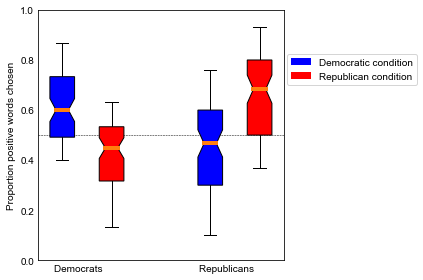

In [32]:
fig, ax = plt.subplots(1)
x_dd = psummary_ws.loc[(psummary_ws["Condition"] == 0) & (psummary_ws["ident"] == 0)]["p"]
x_dr = psummary_ws.loc[(psummary_ws["Condition"] == 1) & (psummary_ws["ident"] == 0)]["p"]
x_rd = psummary_ws.loc[(psummary_ws["Condition"] == 0) & (psummary_ws["ident"] == 1)]["p"]
x_rr = psummary_ws.loc[(psummary_ws["Condition"] == 1) & (psummary_ws["ident"] == 1)]["p"]
bplots = ax.boxplot([ x_dd, x_dr, np.full(2, fill_value=np.nan), x_rd, x_rr ],
                    notch=True, patch_artist=True, sym="", whis=[5,95]
                   )
bplots["boxes"][0].set_facecolor("blue")
bplots["boxes"][1].set_facecolor("red")
bplots["boxes"][3].set_facecolor("blue")
bplots["boxes"][4].set_facecolor("red")
for med in bplots["medians"]:
    med.set(linewidth=4)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_xlim(*xlim)
ax.set_ylim(0,1)
ax.plot(xlim, [.5,.5], color = "k", linestyle = "--", linewidth = .5)
legend_elements = [Patch(facecolor="blue", label="Democratic condition"),
                   Patch(facecolor="red", label="Republican condition")
                  ]
ax.legend(handles=legend_elements, loc=(1.01,.7))
ax.set_ylabel("Proportion positive words chosen")
ax.set_xticklabels([ "            Democrats", "", "", "            Republicans", "" ])
ax.tick_params(axis="both", which="both",length=0)
plt.tight_layout()
plt.savefig("figure4a")

#### Mixed effects model

In [33]:
# `recode_within_subjects` modifies the dataframe in place, so create a copy
politics1 = politics.copy()

In [34]:
df_ = recode_within_subjects(politics1, ixs=ixs)
df_ = df_.join(demographics, on="ID", how="left", rsuffix="_r")
df_ = df_[list(ixs)+["age","gender","ident","party_strength","Condition"]]
df_[ixs] = df_[ixs].replace({ np.nan: -2 })
df_["party_strength"] = df_["party_strength"].replace({ "1 (very little)": 0, "2": 1, 
                                                        "3": 2, "4": 3, "5": 4, "6": 5, 
                                                        "7 (very much)": 6
                                                      })

In [35]:
%%R -i df_,ixs
library(lmerTest)
library(tidyverse)

options(contrasts=c("contr.sum","contr.poly"))

df <- df_ %>%
    as_tibble %>%
    mutate_at(paste0("X", ixs), function (x) replace(x, x==-2, NA)) %>%
    mutate(ID=1:nrow(.)) %>%
    pivot_longer(paste0("X", ixs), names_to="item", values_to="pos") %>%
    mutate(gender=replace(gender, !(gender %in% c("Male","Female")), NA),
           gender=ifelse(gender=="Male", 1, -1),
           ident=ifelse(ident=="REPUBLICAN", sqrt(.5), -sqrt(.5)),
           Condition=ifelse(Condition=="REPUBLICAN", sqrt(.5), -sqrt(.5)),
           age=age-18
          )
    
fit <- glmer(pos ~ Condition * ident + (1|ID) + (1|item), data=df, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: pos ~ Condition * ident + (1 | ID) + (1 | item)
   Data: df

     AIC      BIC   logLik deviance df.resid 
 10360.5  10402.6  -5174.2  10348.5     8299 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1957 -0.8763  0.3698  0.8137  3.2856 

Random effects:
 Groups Name        Variance Std.Dev.
 ID     (Intercept) 0.86896  0.9322  
 item   (Intercept) 0.06278  0.2506  
Number of obs: 8305, groups:  ID, 280; item, 30

Fixed effects:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      0.14601    0.07638   1.912   0.0559 .  
Condition        0.01677    0.08650   0.194   0.8462    
ident            0.11180    0.08650   1.292   0.1962    
Condition:ident  0.99295    0.12255   8.103 5.38e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) Condtn ident 
Co

In [36]:
%%R
# +- 2 SE
coef.interact <- summary(fit)$coefficients[4,1]
se.interact <- summary(fit)$coefficients[4,2]
print(c(coef.interact - 2*se.interact, coef.interact + 2*se.interact))

[1] 0.7478578 1.2380482


In [37]:
%%R
exp(summary(fit)$coefficients[4,1])

[1] 2.699193


In [38]:
%%R
null.fit <- glmer(pos ~ Condition + ident + (1|ID) + (1|item), data=df, family="binomial")
anova_res <- anova(null.fit, fit, test="LRT")
anova_res

Data: df
Models:
null.fit: pos ~ Condition + ident + (1 | ID) + (1 | item)
fit: pos ~ Condition * ident + (1 | ID) + (1 | item)
         npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)    
null.fit    5 10418 10453 -5203.9    10408                         
fit         6 10360 10403 -5174.2    10348 59.315  1  1.344e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [39]:
%%R
fit <- glmer(pos ~ Condition * ident + Condition * age + Condition * gender + Condition * ident * party_strength + (1|ID) + (1|item),
             data=df, family="binomial", glmerControl(optimizer="bobyqa", optCtrl = list(maxfun = 100000))
            )
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: pos ~ Condition * ident + Condition * age + Condition * gender +  
    Condition * ident * party_strength + (1 | ID) + (1 | item)
   Data: df
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

     AIC      BIC   logLik deviance df.resid 
 10308.5  10406.8  -5140.3  10280.5     8261 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3516 -0.8740  0.3602  0.8169  3.0484 

Random effects:
 Groups Name        Variance Std.Dev.
 ID     (Intercept) 0.76857  0.8767  
 item   (Intercept) 0.06469  0.2544  
Number of obs: 8275, groups:  ID, 279; item, 30

Fixed effects:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    -0.118783   0.192758  -0.616   0.5377    
Condition                      -0.489882   0.264577  -1.852   0.0641 .  
ident                           0.008767 

##### Figure 4B

In [40]:
%%R
df.avb <- df %>%
    filter(!is.na(party_strength)) %>%
    mutate(avb=pos, avb=ifelse(.$ident==.$Condition, avb, 1-avb)) %>%
    group_by(ID) %>%
    summarise(avb=mean(avb, na.rm=TRUE), SPI=mean(party_strength))
    
df.4b <- df.avb %>%
    group_by(SPI) %>%
    summarise(avb=mean(avb, na.rm=TRUE), ct=n()) %>%
    mutate(se=sqrt(avb*(1-avb)/ct))
    
df.4b %>%
    ggplot(mapping=aes(x=SPI+1, y=avb, ymin=avb-se, ymax=avb+se, size=ct)) +
    geom_point(show.legend=FALSE) +
    geom_errorbar(size=.2, width=.2) +
    geom_hline(yintercept=.5, linetype=3) +
    xlab("Strength of party identity (SPI)") +
    ylab("Magnitude of AVB") +
    ylim(0,1) +
    scale_x_continuous(breaks=1:7) +
    theme_bw() +
    theme(axis.title=element_text(size=25))
ggsave("figure4b.jpg")

In [41]:
%%R
cor.test(df.avb$avb, df.avb$SPI)


	Pearson's product-moment correlation

data:  df.avb$avb and df.avb$SPI
t = 4.2491, df = 278, p-value = 2.932e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1335959 0.3539261
sample estimates:
    cor 
0.24695 



In [42]:
%%R
options(scipen=999)
df %>%
    mutate(svb=pos, svb=ifelse(.$ident==.$Condition, svb, 1-svb)) %>%
    group_by(ID) %>%
    summarise(svb=mean(svb, na.rm=TRUE)) %>%
    mutate(exhibits.svb=svb>.5) %>%
    summarise(sum(exhibits.svb), p=mean(exhibits.svb), n=n()) %>%
    mutate(se=sqrt(p*(1-p)/n), lb=p-2*se, ub=p+2*se)

# A tibble: 1 x 6
  `sum(exhibits.svb)`     p     n     se    lb    ub
                <int> <dbl> <int>  <dbl> <dbl> <dbl>
1                 186 0.664   280 0.0282 0.608 0.721


## Controlling for perceived construal level

Hypothesis: mean(% abstract words chosen amongst those whose condition matched their political identity) - mean(% concrete words chosen amongst those whose condition didn't match their political identity) < 0

Which word in a pair is considered more abstract is operationalized at the within-subjects level.

In [43]:
pdummied, Y = dummy(politics, [ "REPUBLICAN", "DEMOCRAT" ],
                    within = True, ixs = ixs, df2 = cl,
                    conditions = [ "ABSTRACT", "CONCRETE" ])
psummary_ws = summarize(pdummied, ixs)

In [44]:
a = psummary_ws.loc[psummary_ws["Condition"] != psummary_ws["ident"]]["p"]
b = psummary_ws.loc[psummary_ws["Condition"] == psummary_ws["ident"]]["p"]

In [45]:
dsw_a = sms.DescrStatsW(a)
dsw_b = sms.DescrStatsW(b)
cm = sms.CompareMeans(dsw_a, dsw_b)
cm.ttest_ind(usevar="unequal", alternative = "larger")

(0.4006151499261234, 0.34450570445808715, 277.80432612877297)

In [46]:
delta = dsw_a.mean - dsw_b.mean
se_delta = cm.std_meandiff_separatevar
print(delta, delta - 2*se_delta, delta + 2*se_delta)

(0.011704797855254578, -0.0467293270519689, 0.07013892276247806)


### Mixed effects model

In [47]:
politics2 = politics.copy()
df_cl = recode_within_subjects(politics2, df2=cl, conditions=["ABSTRACT","CONCRETE"], 
                               ixs=ixs
                              )
df_cl = df_cl[list(ixs)+["ident","Condition"]]
df_cl[ixs] = df_cl[ixs].replace({ np.nan: -2 })
df_cl = df_cl.loc[df_.index]

In [48]:
%%R -i df_cl
df.cl <- df_cl %>%
    as_tibble %>%
    mutate_at(paste0("X", ixs), function (x) replace(x, x==-2, NA)) %>%
    mutate(ID=1:nrow(.)) %>%
    pivot_longer(paste0("X", ixs), names_to="item", values_to="abstract") %>%
    mutate(ident=ifelse(ident=="REPUBLICAN", sqrt(.5), -sqrt(.5)),
           Condition=ifelse(Condition=="REPUBLICAN", sqrt(.5), -sqrt(.5)),
           pos=df$pos
          )
    
fit <- glmer(pos ~ Condition * ident * abstract + (1|ID) + (1|item), data=df.cl, family="binomial")
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: pos ~ Condition * ident * abstract + (1 | ID) + (1 | item)
   Data: df.cl

     AIC      BIC   logLik deviance df.resid 
 10322.3  10392.5  -5151.2  10302.3     8261 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2551 -0.8723  0.3659  0.8109  3.3117 

Random effects:
 Groups Name        Variance Std.Dev.
 ID     (Intercept) 0.86348  0.9292  
 item   (Intercept) 0.06111  0.2472  
Number of obs: 8271, groups:  ID, 280; item, 30

Fixed effects:
                          Estimate Std. Error z value           Pr(>|z|)    
(Intercept)               0.080832   0.080772   1.001             0.3170    
Condition                -0.004014   0.094721  -0.042             0.9662    
ident                     0.045282   0.094721   0.478             0.6326    
abstract                  0.128536   0.053771   2.390             0.0168 *  
Condition:ident    